
[link text](https://www.slideserve.com/fallon-bowers/the-physics-of-skydiving)

The-physics-of-skydiving


Calculating terminal velocity
Terminal velocity can be calculated using a complex formula that takes into account the mass of the skydiver and the area, or the proportion of their body that is acted upon by air resistance as they fall.

The formula is Vt = (2 * m * g) / (p * A * Cd)

This formula comprises of :

Vt = Terminal velocity
m = Mass of the skydiver
g = Acceleration due to gravity (9.8 m/s^2 at sea level)
p = Density of air
A = Area of the object, normally determined by the skydiver’s body position
Cd = Drag coefficient (this depends on the shape of the object and the roughness of its surface)
The larger the skydiver’s mass, the cross-sectional area, and the drag coefficient, the slower the terminal velocity will be. Conversely, if the skydiver’s mass is smaller, their cross-sectional area is smaller, or their drag coefficient is lower, their terminal velocity will be higher.

They have developed a terminal velocity calculator that takes into account crucial parameters such as projected area, drag coefficient, gravitational force, air densities, and more.

By inputting the relevant data, such as the area of the object, its shape, the density of the fluid (air), and the acceleration due to gravity, the calculator predicts the point at which the skydiver will reach terminal velocity during freefall. This information is vital for skydivers and instructors to plan and execute safe jumps.





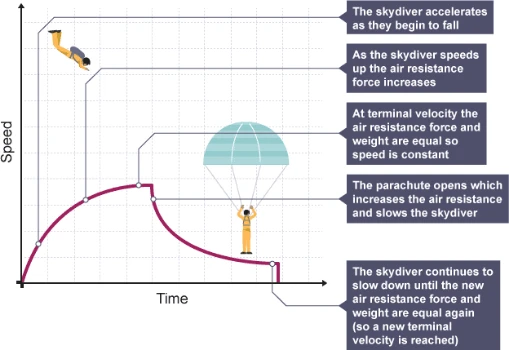

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            2
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:            990
 Number of total equations: -          990
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.38243E-12  7.84800E+02
    1  8.07267E-15  9.71188E+01
    2  1.9384

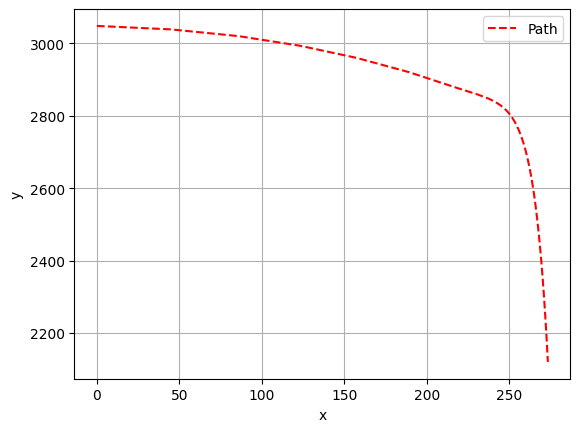

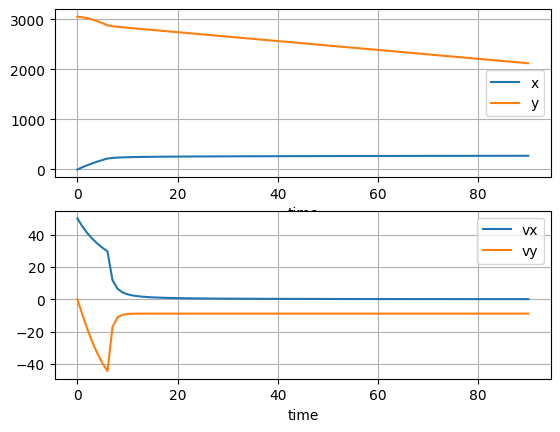

In [21]:
!pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
#number of points in time discretization
n = 91

#Initialize Model
m = GEKKO(remote=False)

#define time discretization
m.time = np.linspace(0,90,n)

#make array of drag coefficients, changing at time 60
drag = [(0.2 if t<=6 else 10) for t in m.time]

#define constants
g = m.Const(value=9.81)
mass = m.Const(value=100)

#define drag parameter
d = m.Param(value=drag)

#initialize variables
x,y,vx,vy,v,Fx,Fy = [m.Var(value=0) for i in range(7)]

#initial conditions
y.value = 3048
vx.value = 50

#Equations
# momentum balance
m.Equation(Fx == -d * vx**2)
m.Equation(Fy == -mass*g + d*vy**2)
#F = ma
m.Equation(Fx/mass == vx.dt())
m.Equation(Fy/mass == vy.dt())
#vel = dxdt
m.Equation(vx == x.dt())
m.Equation(vy == y.dt())
#total velocity
m.Equation(v == (vx**2 + vy**2)**.5)

#Set global options
m.options.IMODE = 4 #dynamic simulation

#Solve simulation
m.solve()

#%% Plot results
plt.figure(1)
plt.plot(x.value,y.value,'r--',label='Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(); plt.grid()



plt.figure(2)
plt.subplot(2,1,1)
plt.plot(m.time,x.value,label='x')
plt.plot(m.time,y.value,label='y')
plt.xlabel('time')
plt.legend(); plt.grid()



plt.subplot(2,1,2)
plt.plot(m.time,vx.value,label='vx')
plt.plot(m.time,vy.value,label='vy')
plt.xlabel('time')
plt.legend(); plt.grid()

plt.show()




# New section

# New section